In [1]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from matplotlib import cm
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
from tree_utils import *
import pandas as pd
import joblib


In [2]:
df = pd.read_csv("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Data/MPBROCKMETAL_KGDataSet.csv")
scaler = joblib.load("scaler.pkl")
label_encoder = joblib.load("label_encoder.pkl") 
best_tree = joblib.load("/Users/carolbarroco/Documents/RecomendSisKNN/TG2 RecommendSys/GitHub/T2-Indroducao-Ciencia-de-Dados/Modeling/best_tree.pkl")

In [3]:
del df["Unnamed: 0"]
del df["Unnamed: 0.1"]

In [4]:

def pDecisionTree(Xdata, ydata):
    feature_names = Xdata.columns

    # Scale new data
    X_new_scaled = scaler.transform(Xdata)
    X_new = pd.DataFrame(X_new_scaled, columns=feature_names)
    y_true_encoded = label_encoder.transform(ydata)
    class_labels = label_encoder.classes_

    # Predict using the already-trained best_tree
    tree_pred = best_tree.predict(X_new)


    return X_new,tree_pred, y_true_encoded, class_labels  # Return both to allow accuracy calculation

def getAccuracy(y_pred, y_true_encoded, class_labels):
    acc = accuracy_score(y_true_encoded, y_pred)
    print(f"Accuracy: {acc:.4f}")
    cm = confusion_matrix(y_true_encoded, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(xticks_rotation=45, cmap='Blues')
    

def add_encoded_labels_to_df(y_true_encoded, df):
    df_y_encoded = pd.DataFrame({"track_genre_encoded": y_true_encoded})
    df_combined = pd.merge(df, df_y_encoded, left_index=True, right_index=True)
    return df_combined

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


Accuracy: 0.9730


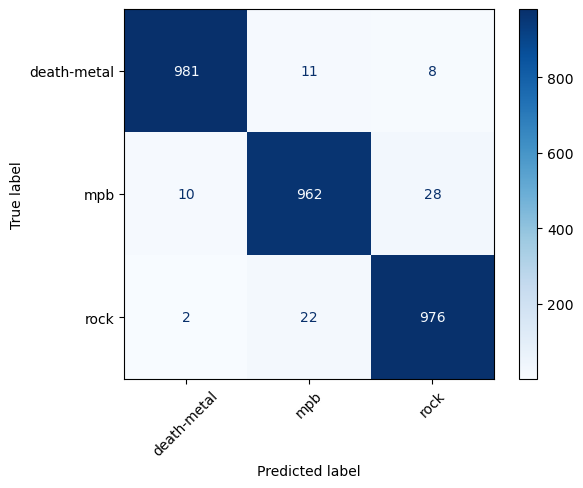

In [5]:
Xs = df.iloc[:, 4:18]
y = df["track_genre"]

t, x, y,z= pDecisionTree(Xs,y)
df_encoded_genr = add_encoded_labels_to_df(y, df)
getAccuracy(x,y,z)

In [6]:
df_with_leaf_nodes =  get_samples_leaf_nodes(best_tree, t)


/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [7]:
df_completo = pd.merge(df_with_leaf_nodes,df, left_index=True, right_index=True)
lista_colunas =  ['track_id', 'artists', 'album_name', 'track_name','popularity', 'duration_ms', 'explicit', 'danceability', 'leaf_node',
'energy','key', 'loudness', 'speechiness', 'acousticness', 'instrumentalness','liveness', 'valence', 'tempo', 'time_signature', 'track_genre']
       
df_completo = df_completo[lista_colunas]

df_completo

track_id                 artists  \
0     6g2BiiVQqY5v1S4HIrM54F        Rodrigo Amarante   
1     6Dc2tCivms1s2X9myWe4ni        Rodrigo Amarante   
2     76HOOcFt3lKVdScmoScfz1                  Djavan   
3     4crctLJMKJekuqQ7cQLpHV  Nicolas Candido;Olívia   
4     0XXwP0EmpOEqWxcL9aSreJ               Fábio Jr.   
...                      ...                     ...   
2995  78adEMnfn1XolaOh2QAjZS                Brujeria   
2996  53c9YHuifgAWJoqgPOgPUn               Unleashed   
2997  6us7QqYJGMGZqej8dKCFGC          Bury Your Dead   
2998  5l5XKQmo9M0XHdNAPddq0i                   Surra   
2999  1eUrfmvVOuy7RsS11Kz74Q         Toxic Holocaust   

                                             album_name  \
0     Tuyo (Narcos Theme) [Extended Version] [A Netf...   
1     Tuyo (Narcos Theme) [A Netflix Original Series...   
2                                      Djavan "Ao Vivo"   
3                            Apaga a Luz (feat. Olívia)   
4                                             Fabio Jr.   
...                                                 ...   
2995                                         Brujerizmo   
2996                                Gods of Death Metal   
2997                                  Cover Your Tracks   
2998                                       Bica na Cara   
2999                            An Overdose of Death...   

                                             track_name  popularity  \
0     Tuyo (Narcos Theme) [Extended Version] - A Net...          66   
1     Tuyo (Narcos Theme) - A Netflix Original Serie...          65   
2                                        Azul (Ao Vivo)          49   
3                            Apaga a Luz (feat. Olívia)          49   
4                                      Pareço um Menino          50   
...                                                 ...         ...   
2995                            Laboratorio Cristalitos          20   
2996                          Long Before Winter's Call           0   
2997                                Mission: Impossible          21   
2998                                     Vida de Babaca          22   
2999                       Feedback, Blood & Distortion          22   

      duration_ms  explicit  danceability  leaf_node  energy  key  loudness  \
0          151565     False         0.765        210   0.497    1    -7.806   
1           89293     False         0.720        210   0.422    1   -13.338   
2          259066     False         0.632        163   0.651    7    -8.658   
3          216446     False         0.610        158   0.420    4   -10.889   
4          273906     False         0.580        158   0.330    7   -13.703   
...           ...       ...           ...        ...     ...  ...       ...   
2995        91866     False         0.474        125   0.993    1    -5.850   
2996       227616     False         0.370         21   0.993    7    -4.465   
2997       162973      True         0.307        125   0.976    2    -3.552   
2998       135893      True         0.362        209   0.994    6    -1.722   
2999       206973     False         0.260        125   0.994   10    -5.291   

      speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
0          0.0402      0.492000          0.366000    0.1430   0.4570  112.195   
1          0.0690      0.474000          0.084700    0.1550   0.5460  112.219   
2          0.0401      0.756000          0.000004    0.7260   0.6520  119.567   
3          0.0462      0.815000          0.000000    0.1230   0.5530   96.313   
4          0.0295      0.596000          0.000001    0.0849   0.3730  136.408   
...           ...           ...               ...       ...      ...      ...   
2995       0.1270      0.000432          0.030100    0.3380   0.1550  128.239   
2996       0.1310      0.000078          0.006220    0.1270   0.0398  103.052   
2997       0.2790      0.000033          0.010600    0.3110   0.4880   83.527   
2998       0.1260      0.0

In [44]:
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

def getAllRecommendationsWithDistances(df, feature_start=4, feature_end=19, n_neighbors=5):
    # Select and scale features
    X = df.iloc[:, feature_start:feature_end]
    X["leaf_node"] = X["leaf_node"] * 2 
    scaler = MinMaxScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Fit NearestNeighbors model (+1 to include the point itself, which we'll remove)
    knn = NearestNeighbors(n_neighbors=n_neighbors + 1, metric='euclidean')
    knn.fit(X_scaled)

    # Find neighbors
    distances, indices = knn.kneighbors(X_scaled)

    # For each sample, build a dict of {index: distance}, excluding the point itself
    neighbors_dicts = [
        {int(idx): float(dist) for idx, dist in zip(idx_list[1:], dist_list[1:])}
        for idx_list, dist_list in zip(indices, distances)
    ]

    # Add to DataFrame
    df_with_recommendations = df.copy()
    df_with_recommendations["Recommendations"] = neighbors_dicts

    return df_with_recommendations


df_with_recommendations = getAllRecommendationsWithDistances(df_completo)

In [45]:
import plotly.express as px
from sklearn.decomposition import PCA
import pandas as pd

def interactive_pca_plot(df, genre):
    # === Filter and reduce to first 50 rows ===
    genre_df = df[df["track_genre"] == genre].copy()

    # === Prepare features ===
    features = genre_df.columns[4:19]  # Adjust if necessary
    X = genre_df[features]

    # === Run PCA ===
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)
    
    # === Create DataFrame for plot ===
    pca_df = pd.DataFrame(X_pca, columns=["PC1", "PC2"])
    pca_df["track_name"] = genre_df["track_name"].values
    pca_df["index"] = genre_df.index
    pca_df["track_genre"] = genre_df["track_genre"].values
    pca_df["origin"] = genre_df.index  # each track is its own origin
    pca_df["leaf_node"] = genre_df["leaf_node"].values
    pca_df["type"] = "original"

    # === Add recommendations ===
    for idx in genre_df.index:
        recommendations = df.loc[idx, "Recommendations"]
        for rec_idx in recommendations:
            rec_row = df.loc[rec_idx]
            rec_features = rec_row[features].values.reshape(1, -1)
            rec_pca = pca.transform(rec_features)
            pca_df = pd.concat([
                pca_df,
                pd.DataFrame([{
                    "PC1": rec_pca[0, 0],
                    "PC2": rec_pca[0, 1],
                    "track_name": rec_row["track_name"],
                    "leaf_node": rec_row["leaf_node"],
                    "index": rec_idx,
                    "track_genre": rec_row["track_genre"],
                    "origin": idx,
                    "type": "recommendation"
                }])
            ], ignore_index=True)

    # === Define colors based on original song ===
    unique_origins = pca_df[pca_df["type"] == "original"]["origin"].unique()
    color_map = {
        idx: px.colors.qualitative.Safe[i % len(px.colors.qualitative.Safe)]
        for i, idx in enumerate(unique_origins)
    }
    pca_df["color"] = pca_df["origin"].map(color_map)

    # === Plot using only points with hover info ===
    fig = px.scatter(
        pca_df,
        x="PC1",
        y="PC2",
        color="color",
        hover_data={
            "track_name": True,
            "index": True,
            "track_genre": True,
            "origin": True,
            "type": True,
            "leaf_node": True,
            "color": False,  # hide actual color code in hove
            "PC1": False,
            "PC2": False
        }
    )
    fig.update_traces(marker=dict(size=8, opacity=0.8), showlegend=False)
    fig.update_layout(title=f"PCA of {genre} Tracks + Recommendations (Hover for details)")
    fig.show()
    return pca_df

interactive_pca_plot(df_with_recommendations, "mpb")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature

PC1        PC2  \
0     -77651.359972  54.966485   
1    -139923.359968  55.951139   
2      29849.639045   2.808423   
3     -12770.360674   3.432403   
4      44689.638699  -5.371102   
...             ...        ...   
5995   58223.639510   6.754083   
5996   61367.638433 -17.074019   
5997  -36296.360437   4.967637   
5998  -31939.361338  -5.651954   
5999   44689.638699  -5.371102   

                                             track_name  index track_genre  \
0     Tuyo (Narcos Theme) [Extended Version] - A Net...      0         mpb   
1     Tuyo (Narcos Theme) - A Netflix Original Serie...      1         mpb   
2                                        Azul (Ao Vivo)      2         mpb   
3                            Apaga a Luz (feat. Olívia)      3         mpb   
4                                      Pareço um Menino      4         mpb   
...                                                 ...    ...         ...   
5995                       Começo, Meio e Fim (Ao Vivo)    792         mpb   
5996                                         Body Paint   1958        rock   
5997                                       Não vá ainda    943         mpb   
5998                                         Amor Maior    258         mpb   
5999                                   Pareço um Menino      4         mpb   

      origin  leaf_node            type               color  
0          0        210        original  rgb(136, 204, 238)  
1          1        210        original  rgb(204, 102, 119)  
2          2        163        original  rgb(221, 204, 119)  
3          3        158        original    rgb(17, 119, 51)  
4          4        158        original    rgb(51, 34, 136)  
...      ...        ...             ...                 ...  
5995     999        163  recommendation     rgb(102, 17, 0)  
5996     999        150  recommendation     rgb(102, 17, 0)  
5997     999        158  recommendation     rgb(102, 17, 0)  
5998     999        158  recommendation     rgb(102, 17, 0)  
5999     999        158  recommendation     rgb(102, 17, 0)  

[6000 rows x 9 columns]

In [42]:
interactive_pca_plot(df_with_recommendations, "rock")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature

PC1         PC2                track_name  index track_genre  \
0    -22890.506009   60.048297          Sex, Drugs, Etc.   1000        rock   
1    -35718.490471  154.568408          I Wanna Be Yours   1001        rock   
2     20725.507113  144.879081           Sweater Weather   1002        rock   
3    -71189.492034  159.566723           I Ain't Worried   1003        rock   
4     67898.504821  128.055223   Nasha (Equals Sessions)   1004        rock   
...            ...         ...                       ...    ...         ...   
5995  33951.477923  -47.209336  Christmas All Over Again   1998        rock   
5996  33951.477923  -47.209336  Christmas All Over Again   1987        rock   
5997  33951.477923  -47.209336  Christmas All Over Again   1995        rock   
5998  33951.477923  -47.209336  Christmas All Over Again   1993        rock   
5999  33951.477923  -47.209336  Christmas All Over Again   1997        rock   

      origin  leaf_node            type               color  
0       1000        111        original  rgb(136, 204, 238)  
1       1001        210        original  rgb(204, 102, 119)  
2       1002        210        original  rgb(221, 204, 119)  
3       1003        210        original    rgb(17, 119, 51)  
4       1004        210        original    rgb(51, 34, 136)  
...      ...        ...             ...                 ...  
5995    1999         44  recommendation     rgb(102, 17, 0)  
5996    1999         44  recommendation     rgb(102, 17, 0)  
5997    1999         44  recommendation     rgb(102, 17, 0)  
5998    1999         44  recommendation     rgb(102, 17, 0)  
5999    1999         44  recommendation     rgb(102, 17, 0)  

[6000 rows x 9 columns]

In [43]:
interactive_pca_plot(df_with_recommendations, "death-metal")

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature names

/opt/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but PCA was fitted with feature

PC1        PC2                 track_name  index  track_genre  \
0      23924.295539 -25.043504            Our Time Is Now   2000  death-metal   
1     183240.295373  -6.545819       Hallowed Be Thy Name   2001  death-metal   
2     -38972.704259  10.370841         Soldier of Fortune   2002  death-metal   
3     -54932.704377  -4.042237         You Only Live Once   2003  death-metal   
4     -23559.704666 -44.907967          Voice of the Soul   2004  death-metal   
...             ...        ...                        ...    ...          ...   
5995 -102670.705112  31.626940               Death Glance   2903  death-metal   
5996  -16042.705068  46.530073                Living Dead   2942  death-metal   
5997 -100358.705050  25.961963  Slave To The God Of Agony   2435  death-metal   
5998  -39895.705319 -13.135584                 Mutilation   2962  death-metal   
5999   80321.294804  11.144188             Shades of Grey   2787  death-metal   

      origin  leaf_node            type               color  
0       2000        133        original  rgb(136, 204, 238)  
1       2001        133        original  rgb(204, 102, 119)  
2       2002        186        original  rgb(221, 204, 119)  
3       2003        125        original    rgb(17, 119, 51)  
4       2004        109        original    rgb(51, 34, 136)  
...      ...        ...             ...                 ...  
5995    2999        125  recommendation     rgb(102, 17, 0)  
5996    2999        125  recommendation     rgb(102, 17, 0)  
5997    2999        125  recommendation     rgb(102, 17, 0)  
5998    2999        125  recommendation     rgb(102, 17, 0)  
5999    2999        133  recommendation     rgb(102, 17, 0)  

[6000 rows x 9 columns]